In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exp1a2a = pd.read_csv('./eval/performances/exp1a-2a_checked.csv', sep=';')[['nama_instansi', 'candidates','status_manual', 'TP', 'TN', 'FP', 'FN']]
exp1a2b = pd.read_csv('./eval/performances/exp1a-2b_checked.csv', sep=';')[['nama_instansi', 'candidates','status_manual', 'TP', 'TN', 'FP', 'FN']]
exp1b2a= pd.read_csv('./eval/performances/exp1b-2a_checked.csv', sep=';')[['nama_instansi', 'candidates','status_manual', 'TP', 'TN', 'FP', 'FN']]
exp1b2b= pd.read_csv('./eval/performances/exp1b-2b_checked_revised.csv', sep=';')[['nama_instansi', 'candidates','status_manual', 'TP', 'TN', 'FP', 'FN']].dropna()

In [3]:
def getTPTNFPFN(df):
    tp = df[(df['TP']=='TRUE')|(df['TP']==True)].shape[0]
    tn = df[(df['TN']=='TRUE') | (df['TN']==True)].shape[0]
    fp = df[(df['FP']=='TRUE') |(df['FP']==True)].shape[0]
    fn = df[(df['FN']=='TRUE') | (df['FN']==True)].shape[0]
    return tp, tn, fp, fn

In [4]:
def getConfMatrix(df, title):
    tp, tn, fp, fn = getTPTNFPFN(df)
    conf_matrix = [[tn, fp], [fn, tp]]
    sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix {title}')
    plt.show();
    return conf_matrix

In [5]:
def clf_report(df):
    tp, tn, fp, fn = getTPTNFPFN(df)
    acc = (tp+tn)/sum([tp, tn, fp, fn])
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1score = 2 *(precision*recall)/(precision+recall)
    print(f"Accuracy: {acc} | Precision: {precision} | Recall: {recall} | F1-Score: {f1score}")
    return acc, precision, recall, f1score

========= Exp1a-2a ========= 



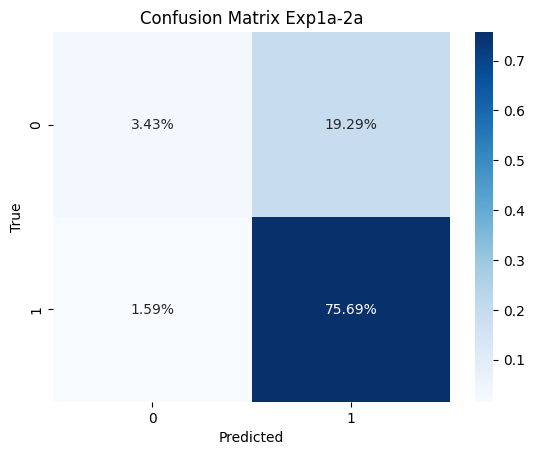

[[26, 146], [12, 573]] 

Accuracy: 0.7912813738441216 | Precision: 0.7969401947148818 | Recall: 0.9794871794871794 | F1-Score: 0.8788343558282208
========= Exp1a-2b ========= 



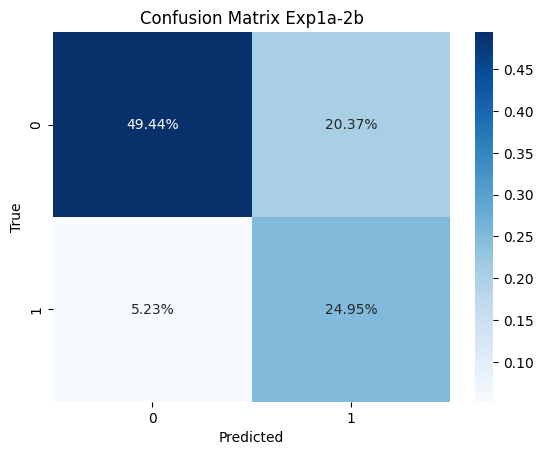

[[1068, 440], [113, 539]] 

Accuracy: 0.7439814814814815 | Precision: 0.550561797752809 | Recall: 0.8266871165644172 | F1-Score: 0.6609442060085837
========= Exp1b-2a ========= 



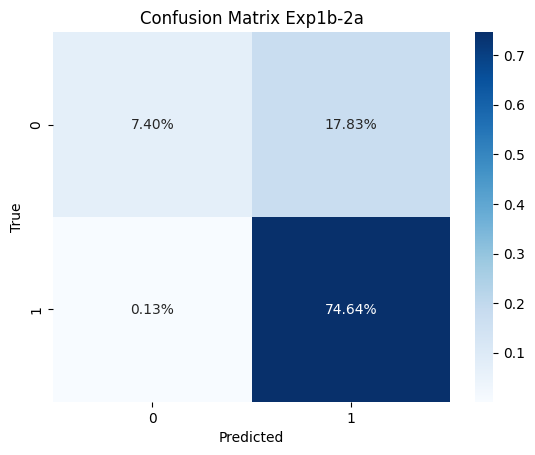

[[56, 135], [1, 565]] 

Accuracy: 0.8203434610303831 | Precision: 0.8071428571428572 | Recall: 0.9982332155477032 | F1-Score: 0.8925750394944708
========= Exp1b-2b ========= 



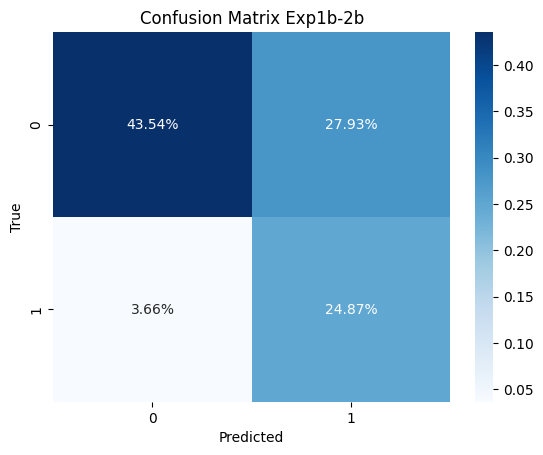

[[940, 603], [79, 537]] 

Accuracy: 0.6841130152848541 | Precision: 0.4710526315789474 | Recall: 0.8717532467532467 | F1-Score: 0.6116173120728929


In [6]:
files = [exp1a2a, exp1a2b, exp1b2a, exp1b2b]
conf_matrices = []
titles = ['Exp1a-2a', 'Exp1a-2b', 'Exp1b-2a', 'Exp1b-2b']
clf_reports = []

for idx, file in enumerate(files):
    title = titles[idx]
    print("=========",title,"=========",'\n')
    cm = getConfMatrix(file, title)
    print(cm, '\n')
    conf_matrices.append(cm)
    cr = clf_report(file)
    clf_reports.append(cr)

In [7]:
exp1a2b.head()

,nama_instansi,candidates,status_manual,TP,TN,FP,FN
0,kementerian kominfo,kominfo,True,True,False,False,False
1,tidak tahu,"Bukan instansi BUMN, Kementerian, Pemerintah",True,False,True,False,False
2,pt maybank indonesia tbk,pt bni,False,False,False,True,False
3,rekanan,"Bukan instansi BUMN, Kementerian, Pemerintah",True,False,True,False,False
4,kemko marves,"Bukan instansi BUMN, Kementerian, Pemerintah",False,False,False,False,True


In [8]:
status_map = {True: 'yes', False: 'no'}
exp1a2b_ = exp1a2b.copy()
exp1a2b_['status_manual'] = exp1a2b_['status_manual'].map(status_map)
exp1a2b_

,nama_instansi,candidates,status_manual,TP,TN,FP,FN
0,kementerian kominfo,kominfo,yes,True,False,False,False
1,tidak tahu,"Bukan instansi BUMN, Kementerian, Pemerintah",yes,False,True,False,False
2,pt maybank indonesia tbk,pt bni,no,False,False,True,False
3,rekanan,"Bukan instansi BUMN, Kementerian, Pemerintah",yes,False,True,False,False
4,kemko marves,"Bukan instansi BUMN, Kementerian, Pemerintah",no,False,False,False,True
...,...,...,...,...,...,...,...
2155,pt cahaya maha pertiwi,pt pii,no,False,False,True,False
2156,pemkab sintang,pemkab sintang,yes,True,False,False,False
2157,desa ginuk,"Bukan instansi BUMN, Kementerian, Pemerintah",yes,False,True,False,False
2158,direktur utama pt bni,direktur utama pt bni,yes,True,False,False,False


In [19]:
exp1a2b_[(exp1a2b_['FN']==True) & (exp1a2b_['nama_instansi'].str.contains('kemen'))]

,nama_instansi,candidates,status_manual,TP,TN,FP,FN
439,kemenaker,"Bukan instansi BUMN, Kementerian, Pemerintah",no,False,False,False,True
1109,kemenpupr,"Bukan instansi BUMN, Kementerian, Pemerintah",no,False,False,False,True
1412,deputi bidang kebijakan strategis kementerian ...,"Bukan instansi BUMN, Kementerian, Pemerintah",no,False,False,False,True
